# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 10 ноября 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

0) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения, то рисуйте его синим цветом.

In [2]:
color_for_normal, color_for_laplace, color_for_cauchy = sns.color_palette("colorblind")[:3]

N = 500

sample_normal = sps.norm.rvs(size=N)
sample_laplace = sps.laplace.rvs(size=N)
sample_cauchy = sps.cauchy.rvs(size=N)

1) Постройте график плотности распределения для всех трех распределений на одних осях.

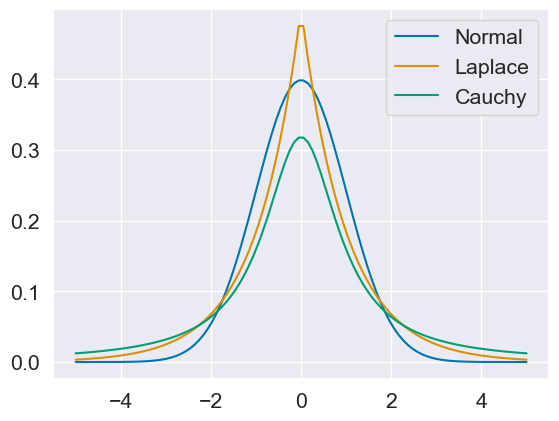

In [3]:
grid = np.linspace(-5, 5, 100)
plt.plot(grid, sps.norm.pdf(grid), color=color_for_normal, label="Normal")
plt.plot(grid, sps.laplace.pdf(grid), color=color_for_laplace, label="Laplace")
plt.plot(grid, sps.cauchy.pdf(grid), color=color_for_cauchy, label="Cauchy")
plt.legend()
plt.show()


2) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

как видно по графикам, у нормального распределения выборка более центрирована по сравнению с выборками Лапласа и Коши. 

для нормального распределения среднее лучше оценивает параметр чем медиана, это можно понять через асимптотическую нормальность: 


$$\sqrt n (\overline X - \theta) \overset{d}{\rightarrow} \xi \thicksim Norm(0, 1)$$

$$\sqrt n (\hat \mu - \theta) \overset{d}{\rightarrow} \xi \thicksim Norm(0, \frac{\pi}{2}) $$

асимптотическая дисперсия медианы больше чем у среднего

У распределения Лапласа наоборот - медиана будет лучше

$$\sqrt n (\overline X - \theta) \overset{d}{\rightarrow} \xi \thicksim Norm(0, 2)$$

$$\sqrt n (\hat \mu - \theta) \overset{d}{\rightarrow} \xi \thicksim Norm(0, 1)$$

у Распределения Коши нету математического ожидания как и дисперсии. В предыдущих задания мы выяснили что среднее для распределения Коши плохо оценивает параметр сдвига из за того что в выборку с не малой вероятностью могли попасть слишком большие значения, так что для него мы не способны посчитать его риск или же асимптотическую дисперсию. А вот с медианой дела обстаят получше: 

$$\sqrt n (\hat \mu - \theta) \overset{d}{\rightarrow} \xi \thicksim Norm(0, \frac{\pi^{2}}{4}) $$

In [4]:
def average_est(sample):
    return np.mean(sample)

def median_est(sample):
    return np.median(sample)

def estimations_accuracy(est, param):
    return np.abs(est - param)

In [5]:
# Эксперименты с оценкой средним и медианы
print("Нормальное")
print(f"среднее: {np.round(estimations_accuracy(average_est(sample_normal), 0), 3)}")
print(f"медиана: {np.round(estimations_accuracy(median_est(sample_normal), 0), 3)}")
print()
print("Лаплас")
print(f"среднее: {np.round(estimations_accuracy(average_est(sample_laplace), 0), 3)}")
print(f"медиана: {np.round(estimations_accuracy(median_est(sample_laplace), 0), 3)}")
print()
print("Коши")
print(f"среднее: {np.round(estimations_accuracy(average_est(sample_cauchy), 0), 3)}")
print(f"медиана: {np.round(estimations_accuracy(median_est(sample_cauchy), 0), 3)}")


Нормальное
среднее: 0.001
медиана: 0.062

Лаплас
среднее: 0.008
медиана: 0.003

Коши
среднее: 0.067
медиана: 0.016


3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [156]:
def truncated_mean(sample, alpha):
    size = len(sample)
    sample_copy = np.copy(sample)
    sample_copy = np.sort(sample_copy)
    quantile_1_ind, quantile_2_ind = (size * alpha), (size * (1 - alpha))
    sample_copy = sample_copy[int(quantile_1_ind): int(quantile_2_ind)]
    
    return np.mean(sample_copy)

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

Gокажем пример для Стандартного нормального рапределения

In [180]:
NN = 300
new_sample = sps.norm.rvs(size = NN)

/Users/aitore_04/Desktop/all_stuff/материалы мфти/третий_курс_мат/python_prac/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aitore_04/Desktop/all_stuff/материалы мфти/третий_курс_мат/python_prac/myenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aitore_04/Desktop/all_stuff/материалы мфти/третий_курс_мат/python_prac/myenv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aitore_04/Desktop/all_stuff/материалы мфти/третий_курс_мат/python_prac/myenv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aitore_04/Desktop/all_stuff/материалы мфти/тр

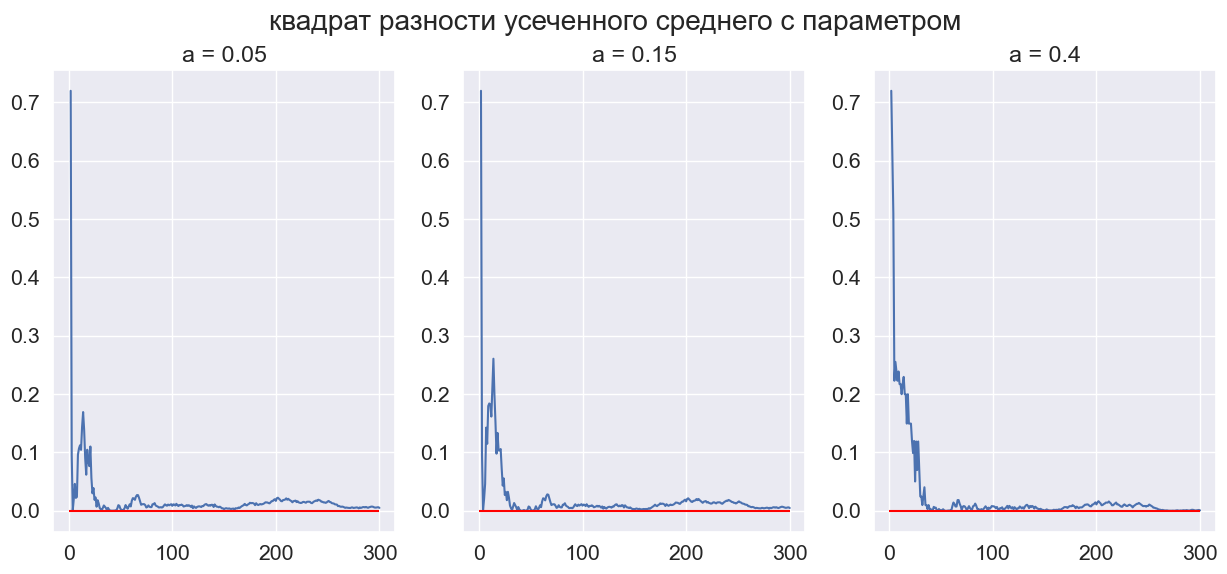

In [184]:
alphas = [0.05, 0.15, 0.4]
x = range(1,NN+1)

fig, axe = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle("квадрат разности усеченного среднего с параметром")

axe[0].set_title('a = 0.05')
axe[1].set_title('a = 0.15')
axe[2].set_title('a = 0.4')

for j in np.arange(0, 3):
    truncated_mean_sample = [truncated_mean(new_sample[:i], alphas[j]) for i in x]
    square_sample = np.array(truncated_mean_sample)**2
    sns.lineplot(ax=axe[j],
                 x=x,
                 y=square_sample)    
    axe.flat[j].hlines(0, 0, NN, color="red", linestyle = "-")

plt.show()


**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [7]:
from scipy.integrate import quad

In [28]:
def asymptotic_variance(alpha, dist):
    my_quad = quad(lambda x: x**2 * dist.pdf(x), 0, dist.ppf(1 - alpha))[0]
    as_var = 2 * (my_quad + alpha * (dist.ppf(1 - alpha))**2) / (1 - 2 * alpha)**2

    return as_var

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

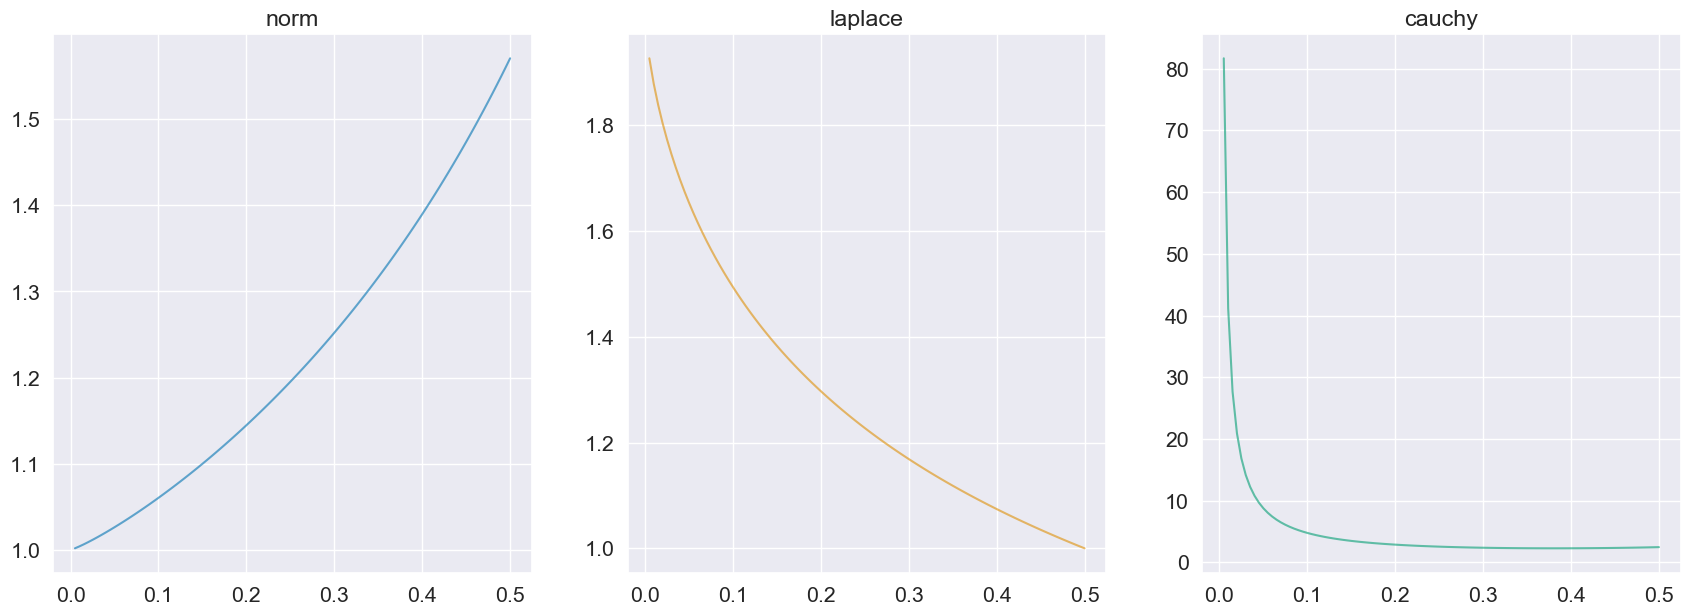

In [38]:
eps = 1e-5
alpha_grid = np.linspace(0.005, 0.5 - eps, 100)

fig, axes = plt.subplots(1, 3, figsize=(21,7))

axes[0].set_title('norm',)
axes[1].set_title('laplace',)
axes[2].set_title('cauchy')

asymptotic_var_list = np.vectorize(asymptotic_variance)

distributions = [sps.norm, sps.laplace, sps.cauchy]
distribution_samples = [sample_normal, sample_laplace, sample_cauchy]
distribution_colors = [color_for_normal, color_for_laplace, color_for_cauchy]

for i in np.arange(0, 3):
    sns.lineplot(ax=axes[i],
                 x=alpha_grid,
                 y=asymptotic_var_list(alpha_grid, distributions[i]),
                 alpha=0.6,
                 color=distribution_colors[i])
plt.show()

6) Breakdown point в статистике неформально называется такое наибольшее число $x$ от 0 до 1, что если изменить больше $(100\cdot x)\%$ наблюдений выборки на выбросы, то оценка "пойдёт в разнос" и её значение может оказаться сколь угодно большим по модулю, как если бы вся выборка состояла из выбросов.

Предположите, как Breakdown point зависит от параметра $\alpha$.

Ответ:

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных $(100\cdot x)\%$ выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

7) Для каждого распределения на отдельном графике по всем префиксам постройте значение трех оценок: среднего, медианы и усечённого среднего порядка $0.35$. Для усечённого среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [202]:
#YOUR CODE GOES HERE
median_norm = [np.median(sample_normal[:i]) for i in range(1, N+1)]
mean_est_norm = [np.mean(sample_normal[:i]) for i in range(1, N+1)]
tr_mean_norm = [truncated_mean(sample_normal[:i], 0.35) for i in range(1, N+1)]

median_laplace = [np.median(sample_laplace[:n]) for n in range(1, N+1)]
mean_est_laplace = [np.mean(sample_laplace[:n]) for n in range(1, N+1)]
tr_mean_laplace = [truncated_mean(sample_laplace[:n], 0.35) for n in range(1, N+1)]

median_cauchy = [np.median(sample_cauchy[:n]) for n in range(1, N+1)]
mean_est_cauchy = [np.mean(sample_cauchy[:n]) for n in range(1, N+1)]
tr_mean_cauchy = [truncated_mean(sample_cauchy[:n], 0.35) for n in range(1, N+1)]

**Нормальное распределение**

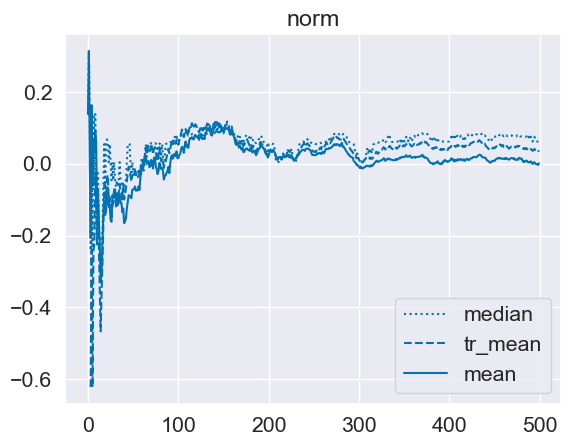

In [203]:
plt.plot(median_norm, linestyle=":", color=color_for_normal, label="median")
plt.plot(tr_mean_norm, linestyle="--", color=color_for_normal, label="tr_mean")
plt.plot(mean_est_norm, color=color_for_normal, label="mean")
plt.legend(loc="best")

plt.title("norm")
plt.show()

**Распределение Лапласа**

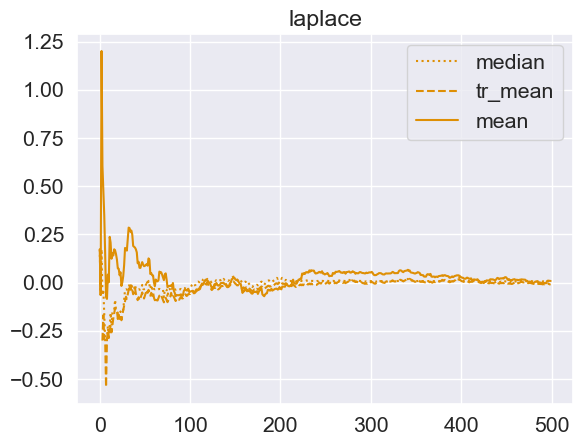

In [204]:
plt.plot(median_laplace, linestyle=":", color=color_for_laplace, label="median")
plt.plot(tr_mean_laplace, linestyle="--", color=color_for_laplace, label="tr_mean")
plt.plot(mean_est_laplace, color=color_for_laplace, label="mean")
plt.legend(loc="best")

plt.title("laplace")
plt.show()

**Распределение Коши**

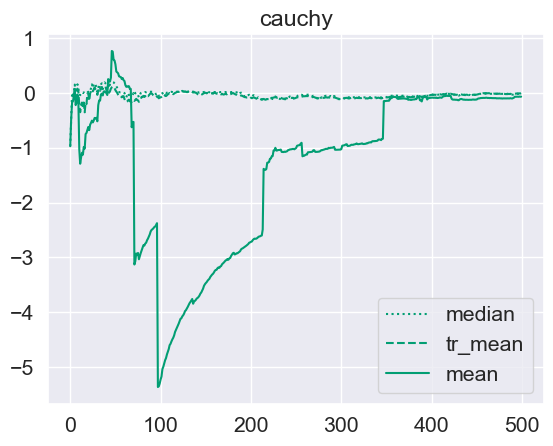

In [205]:
plt.plot(median_cauchy, linestyle=":", color=color_for_cauchy, label="median")
plt.plot(tr_mean_cauchy, linestyle="--", color=color_for_cauchy, label="tr_mean")
plt.plot(mean_est_cauchy, color=color_for_cauchy, label="mean")
plt.legend(loc="best")

plt.title("cauchy")
plt.show()

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

судя по графикам у нормального распределения медиана лучше всех приближает параметр, далее усеченное среднее и после нее бычное среднее, все довольно неплохо справляются

аналогично для распределения Лапласа

в распределении Коши видно что медиана и усеченное среднее обе хорошо приближают параметр. Так как в усеченном среднем выбрасываются все выбросы становится возможным нормально оценить параметр сдвига. В обычном среднем видно что без усечения выбросы сильно портят оценку.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального Правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее? Указание: "усекать" можно не только по квантилю, но и по числу

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

3.5) Выразите усечённое среднее как L-оценку

Ответ:

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [206]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

exec: Failed to execute process '/Users/aitore_04/Desktop/all_stuff/материалы мфти/третий_курс_мат/python_prac/myenv/bin/pip': The file specified the interpreter '/Users/aitore_04/Desktop/python_prac/myenv/bin/python3.12', which is not an executable command.
fish: No matches for wildcard 'https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta'. See `help wildcards-globbing`.
gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^


In [207]:
import pandas as pd

In [208]:
data = pd.read_csv("winequality-red.csv")

In [210]:
data.head(5)
type(data)

pandas.core.frame.DataFrame

Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [238]:
conditions = [data["alcohol"] <= 10,
              (data["alcohol"] > 10) & (data["alcohol"] <= 12),
              data["alcohol"] > 12]

choices = ["low alcohol", "medium alcohol", "high alcohol"]

data["category"] = np.select(conditions, choices, default="Unknown")

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [243]:
res_sugar = pd.DataFrame({
    "mean" : data.groupby("category")["residual sugar"].mean(),
    "median" : data.groupby("category")["residual sugar"].median()
})

res_sugar

,mean,median
category,,
high alcohol,2.760993,2.3
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** c увеличением содержания алкоголя, средний показатель сахара тоже начинает расти

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

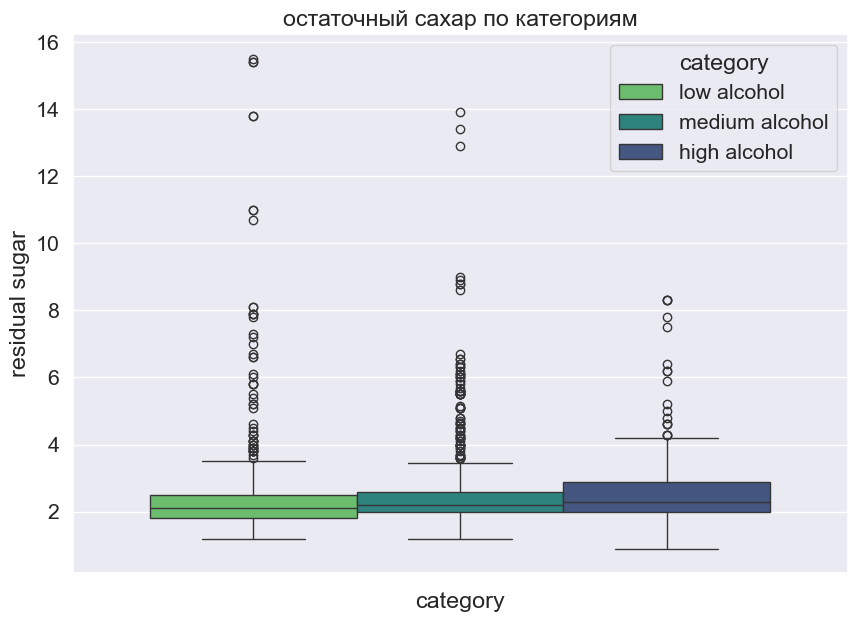

In [266]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]

plt.figure(figsize=(10, 7))
sns.boxplot(hue="category", y="residual sugar", data=data, palette=palette)

plt.title("остаточный сахар по категориям")
plt.xlabel("category")
plt.ylabel("residual sugar")
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** по всем трем категориям - распределение сахара сильно не отличается, как мы можем видеть - почти вся выборка сконцентрирована около 2. Лучше всего для оценивания подойдет медиана, так как в оценке средним значением будет участвовать много выбросов.

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ: у ниского сахара выбросов больше, но и выборка сконцентрирована около медианы(2), в то время как у высокого сахара выборка менее сконцентрирована около медианы, но и выбросов меньше

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

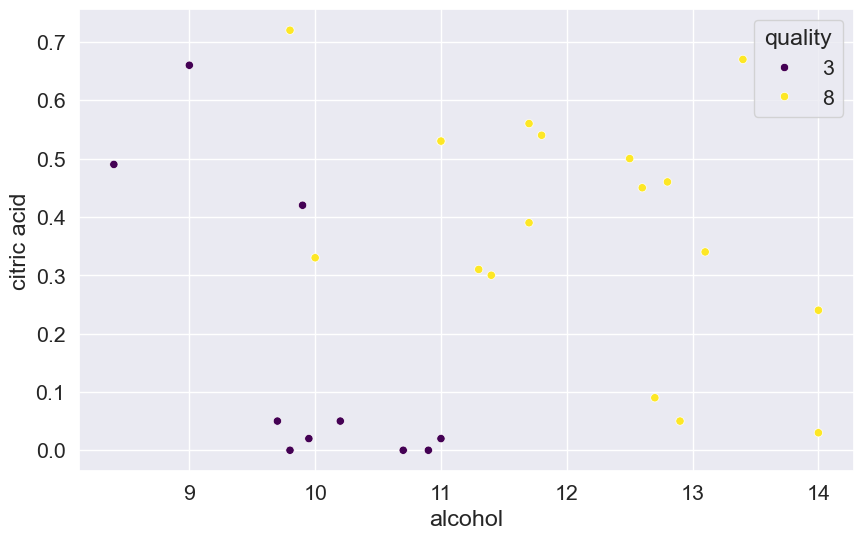

In [273]:
filtered_data = data[(data["quality"] == 3) | (data["quality"] == 8)]

plt.figure(figsize=(10,6))
sns.scatterplot(x="alcohol", y="citric acid", hue="quality", data=filtered_data, palette="viridis") #[palette[0]]+[palette[-1]]
plt.show()

по этому графику видно что вины в высоким содержанием алкоголя чаще являются качественными
а вот вины с низким содержанием лимонной кислоты и средним содержанием алкоголя чаще являются не качественными

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [315]:
new_filtered = filtered_data[["alcohol", "citric acid", "quality"]]

high_quality = filtered_data[filtered_data["quality"] == 8][["alcohol", "citric acid"]]
low_quality = filtered_data[filtered_data["quality"] == 3][["alcohol", "citric acid"]]

high_coords = high_quality.to_numpy()
low_coords = low_quality.to_numpy()

mu_high = np.mean(high_coords, axis=0)
sigma_high = np.cov(high_coords.T)

mu_low = np.mean(low_coords, axis=0)
sigma_low = np.cov(low_coords.T)


X = sps.multivariate_normal(mu_high, sigma_high).pdf(high_coords)
Y = sps.multivariate_normal(mu_low, sigma_low).pdf(low_coords)


Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

In [ ]:
#YOUR CODE GOES HERE

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [ ]:
#YOUR CODE GOES HERE

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, который с высокой вероятностью накрывает истинное значение параметра.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод:

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод:

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-
To: /content/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-
83.8kB [00:00, 41.6MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включительно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?